## Example - Block periodization

This notebook shows features of [streprogen](https://github.com/tommyod/streprogen), the Python strength program generator.

- [GitHub repository](https://github.com/tommyod/streprogen)
- [Python Package Index (PyPI)](https://pypi.org/project/streprogen/)
- [Report issues or make feature requests](https://github.com/tommyod/streprogen/issues)

Contributions to the code are welcome. :)

In [1]:
!pip install streprogen matplotlib --quiet

### Imports

In [2]:
from streprogen import (Program, 
                        reps_to_intensity, 
                        progression_diffeq, 
                        progression_sawtooth, 
                        progression_sinusoidal)
import matplotlib.pyplot as plt
import functools

In [3]:
duration = 12

### Set up periodization of intensity and repetitions

You can periodize intensity and repetitions by using `progression_sawtooth` or `progression_sinusoidal` or creating custom functions. 

**Below I show how to create custom functions.**

In [4]:
def rep_scaler_func(week:int):
    """Custom factors that are multiplied with the `reps_per_exercise`."""
    index = week - 1
    factors = [1.18] * 4 + [1.0] * 4 + [0.82] * 4
    return factors[index % len(factors)]

def intensity_scaler_func(week:int):
    """Custom factors that are multiplied with the `intensity`."""
    index = week - 1
    factors = [0.94] * 4 + [1.0] * 4 + [1.06] * 4
    return factors[index % len(factors)]

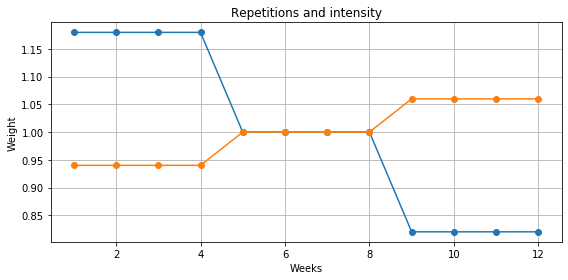

In [5]:
plt.figure(figsize=(8, 4))
plt.title("Repetitions and intensity")

weeks = list(range(1, duration + 1))

y = [rep_scaler_func(w) for w in weeks]
plt.plot(weeks, y, '-o', label="Rep scalers (factors)")

y = [intensity_scaler_func(w) for w in weeks]
plt.plot(weeks, y, '-o', label="Intensity scalers (factors)")
    
plt.xlabel("Weeks"); plt.ylabel("Weight"); plt.grid(); plt.tight_layout()

### Optional: Set up periodization of strength progression (weight lifted)

You can periodize progression by using `progression_sawtooth` or `progression_sinusoidal` or creating your own custom function. **Below I show how to create a custom function.**

In [6]:
def progression_func(week, *args, **kwargs):
    weight = progression_diffeq(week, *args, **kwargs, k=1)
    # Multiply every 4th week by 0.95 for a deload week
    if (week - 1) % 4 == 0:
        return weight * 0.95
    else:
        return weight

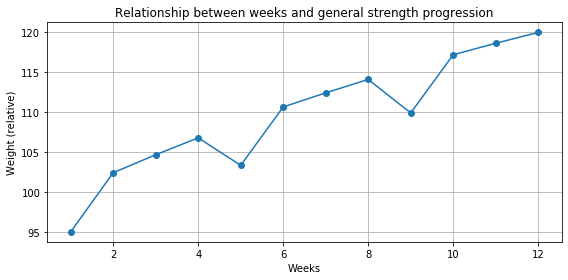

In [7]:
plt.figure(figsize=(8, 4))
plt.title("Relationship between weeks and general strength progression")

weeks = list(range(1, duration + 1))

y = [progression_func(w, start_weight=100, final_weight=120, start_week=1, final_week=12) for w in weeks]
plt.plot(weeks, y, '-o')
    
# Set up the plot and show it
plt.xlabel("Weeks"); plt.ylabel("Weight (relative)")
plt.grid(); plt.tight_layout()

While it's possible to create _any_ progression function, using tweaking defaults is often wise, e.g.,:

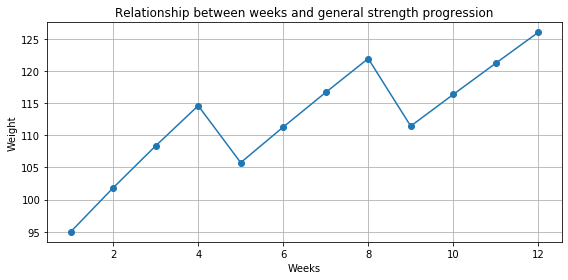

In [8]:
plt.figure(figsize=(8, 4))
plt.title("Relationship between weeks and general strength progression")

weeks = list(range(1, duration + 1))

# Using the `progression_sawtooth` function, we can create out own progression
# function by specifying:
# - k: the non-linearity
# - period: the length of the period (in weeks)
# - scale: the amplitude of the sawtooth
progression_func = functools.partial(progression_sawtooth, k=2.0, period=4, scale=0.05)

y = [progression_func(w, start_weight=100, final_weight=120, start_week=1, final_week=12) for w in weeks]
plt.plot(weeks, y, '-o')
    
# Set up the plot and show it
plt.xlabel("Weeks"); plt.ylabel("Weight")
plt.grid(); plt.tight_layout()

### Program setup

Below is the code creating the program.

The functions `rep_scaler_func`, `intensity_scaler_func` and `progression_func` are created in the code above.

In [9]:
program = Program(
    name='BlockPeriodization',
    duration=duration,
    reps_per_exercise=20, # Baseline reps per exercise, multiplied by `rep_scaler_func(week)`
    min_reps=1, 
    max_reps=8,
    percent_inc_per_week=1,
    intensity=84, # Baseline intensity, multiplied by `intensity_scaler_func(week)`
    rep_scaler_func=rep_scaler_func,
    intensity_scaler_func=intensity_scaler_func,
    units='',
    # Comment out the line below to use the default progression
    progression_func=progression_func,
    round_to=2.5,
)


# Here we only use a single day and exercise to show the periodization
# A realistic program would of course include more exercises :)
with program.Day("A"):
    program.DynamicExercise(name="Squat", start_weight=100)

### Render the program

In [10]:
# Do the computations and render a program. Might take a few seconds.
program.render()

### Print and save the program

In [11]:
print(program)

----------------------------------------------------------------
Program: BlockPeriodization

Program parameters
  duration: 12
  reps_per_exercise: 20
  intensity: 84
  units: 
----------------------------------------------------------------
Exercise information
  A
   Squat   100 -> 112  
    reps: [1, 8]   weekly inc.: 1.0%
----------------------------------------------------------------
Program
 Week 1
  A
   Squat   7 x 75     7 x 75     6 x 77.5   5 x 80     

 Week 2
  A
   Squat   7 x 77.5   7 x 77.5   6 x 82.5   5 x 85     

 Week 3
  A
   Squat   7 x 82.5   7 x 82.5   6 x 85     5 x 90     

 Week 4
  A
   Squat   7 x 87.5   7 x 87.5   6 x 90     5 x 92.5   

 Week 5
  A
   Squat   6 x 82.5   5 x 85     5 x 85     4 x 87.5   

 Week 6
  A
   Squat   6 x 85     5 x 90     5 x 90     4 x 92.5   

 Week 7
  A
   Squat   6 x 90     5 x 92.5   5 x 92.5   4 x 97.5   

 Week 8
  A
   Squat   6 x 92.5   5 x 97.5   5 x 97.5   4 x 100    

 Week 9
  A
   Squat   4 x 92.5   4 x 92.5   3

### Export the program as `.html` or `.tex`, then to `.pdf`

A `.html` file can be printed directly from your browser, or printed to a `.pdf` from your browser.

In [12]:
# Save the program as a HTML file
with open(f'{program.name}.html', 'w', encoding='utf-8') as file:
    # Control table width (number of sets) by passing the 'table_width' argument
    file.write(program.to_html(table_width=8))

In [13]:
# Save the program as a TEX file
with open(f'{program.name}.tex', 'w', encoding='utf-8') as file:
    file.write(program.to_tex(table_width=8))

Use a `.tex` to generate `.pdf` if you have LaTeX installed, or use:
    
- [latexbase.com](https://latexbase.com/) from your browser.

In [14]:
# If you have LaTeX installed on your system, you can render a program to .tex
# Alternatively, you can paste the LaTeX into: https://latexbase.com/

# Remove the comment below to print the .tex file
# print(program.to_tex(table_width=8))